In [1]:
# # print multiple output in single cell
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Exploring the dataset

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe(include="all")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [6]:
df.shape

(200, 5)

In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Feature Selection & Scaling

In [9]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

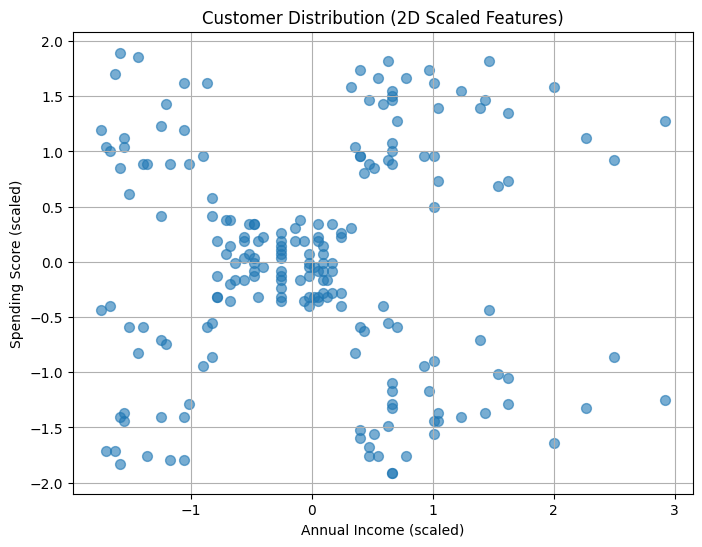

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50, alpha=0.6)
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Distribution (2D Scaled Features)")
plt.grid(True)
plt.show()

# K-means clustring

## Determining the number of clusers using the Elbow Method

c:\Users\polam\anaconda3\envs\yolov8\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\polam\anaconda3\envs\yolov8\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\polam\anaconda3\envs\yolov8\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\polam\anaconda3\envs\yolov8\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

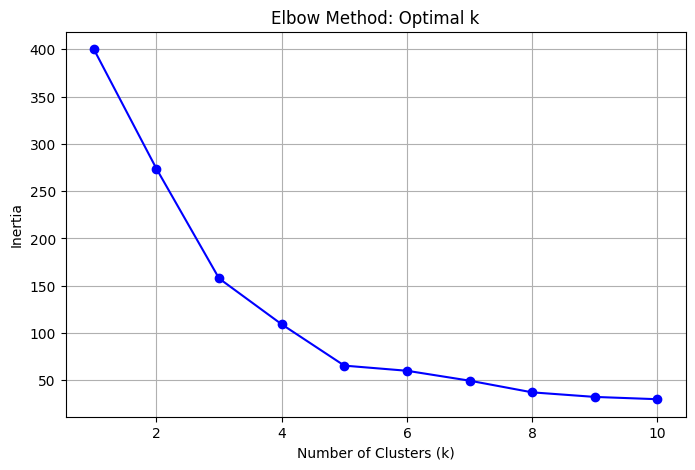

In [12]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method: Optimal k")
plt.grid(True)
plt.show()

## Clustring at K = 5

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

df["Cluster"] = labels

c:\Users\polam\anaconda3\envs\yolov8\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


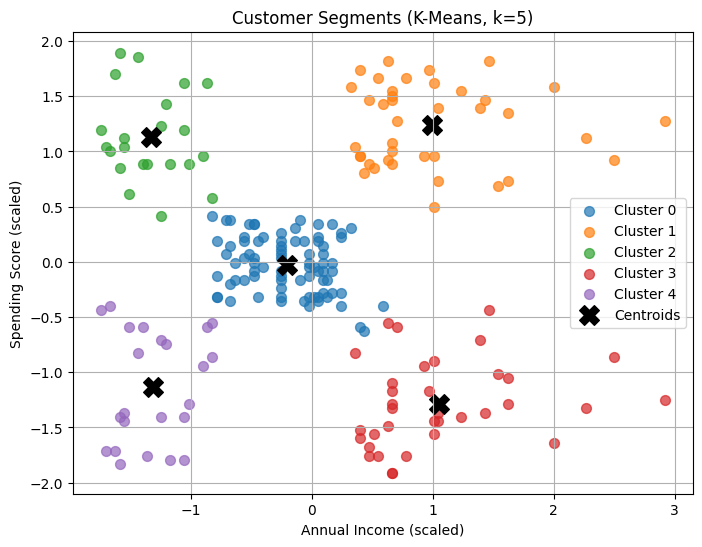

In [14]:
plt.figure(figsize=(8, 6))

# Plot each cluster separately
for cluster in range(5):
    plt.scatter(
        X_scaled[labels == cluster, 0],
        X_scaled[labels == cluster, 1],
        label=f"Cluster {cluster}",
        s=50,
        alpha=0.7
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c='black',
    marker='X',
    label='Centroids'
)

plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments (K-Means, k=5)")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


### Cluster Analysis Summary

| Cluster | Description               | Income ($k) | Spending | Strategy                    |
|---------|---------------------------|-------------|----------|-----------------------------|
| 0       | Average Customers       | ~55         | ~50      | Regular campaigns           |
| 1       | Premium Spenders        | ~86         | ~82      | VIP offers, premium tier    |
| 2       | Impulsive Low-Income   | ~26         | ~79      | Flash sales, trendy items   |
| 3       | Wealthy but Frugal     | ~88         | ~17      | Value-based marketing       |
| 4       | Budget-Conscious       | ~26         | ~21      | Discounts, bundles          |


# DBSCAN

In [16]:
ep = np.arange(0.1, 1.1, 0.05, "float" )
for eps in ep:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(X_scaled)
    db_labels = dbscan.labels_
    print(f"eps={eps}: clusters found =", len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0),
          "| noise points =", list(dbscan.labels_).count(-1))


eps=0.1: clusters found = 4 | noise points = 166
eps=0.15000000000000002: clusters found = 6 | noise points = 117
eps=0.20000000000000004: clusters found = 7 | noise points = 77
eps=0.25000000000000006: clusters found = 6 | noise points = 50
eps=0.30000000000000004: clusters found = 7 | noise points = 35
eps=0.3500000000000001: clusters found = 6 | noise points = 23
eps=0.40000000000000013: clusters found = 4 | noise points = 15
eps=0.45000000000000007: clusters found = 3 | noise points = 11
eps=0.5000000000000001: clusters found = 2 | noise points = 8
eps=0.5500000000000002: clusters found = 1 | noise points = 7
eps=0.6000000000000002: clusters found = 1 | noise points = 5
eps=0.6500000000000001: clusters found = 1 | noise points = 5
eps=0.7000000000000002: clusters found = 1 | noise points = 0
eps=0.7500000000000002: clusters found = 1 | noise points = 0
eps=0.8000000000000002: clusters found = 1 | noise points = 0
eps=0.8500000000000002: clusters found = 1 | noise points = 0
eps=0.9

In [24]:
dbscan = DBSCAN(eps = 0.35, min_samples=5)
dbscan.fit(X_scaled)
db_labels = dbscan.labels_

C:\Users\polam\AppData\Local\Temp\ipykernel_24236\3293801242.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


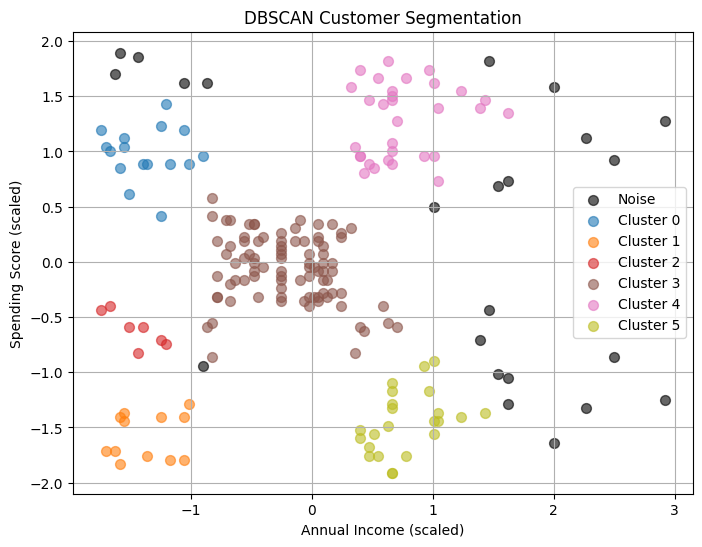

In [25]:
plt.figure(figsize=(8, 6))

unique_labels = np.unique(db_labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for label in unique_labels:
    if label == -1:
        color = 'k'  # black for noise
        label_name = 'Noise'
    else:
        color = colors(label)
        label_name = f"Cluster {label}"

    plt.scatter(
        X_scaled[db_labels == label, 0],
        X_scaled[db_labels == label, 1],
        s=50,
        alpha=0.6,
        label=label_name,
        c=[color]
    )

plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("DBSCAN Customer Segmentation")
plt.legend()
plt.grid(True)
plt.show()


### 🚀 DBSCAN Clustering Summary (eps = 0.35)

- ✅ DBSCAN identified **5 clusters**, similar to K-Means.
- 🚨 It also marked several points as **noise (outliers)** — these were likely edge cases that didn’t fit cleanly into any dense group.
- 🎯 Unlike K-Means, DBSCAN:
  - Doesn’t assume circular clusters
  - Doesn’t require specifying `k`
  - Automatically **ignores noisy outliers**
- The clusters appear well-separated and natural based on density.

#### 🧠 Conclusion:
DBSCAN provided a **more flexible and realistic segmentation**, especially valuable when:
- The data has **non-spherical clusters**
- Or contains **fringe customers** that shouldn’t be forced into groups

